In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [176]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [177]:
data=pd.read_csv("/content/adult.csv")

In [178]:
data.shape

(48842, 15)

In [179]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [180]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [181]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000,48842.000,48842.000,48842.000,48842.000,48842.000
mean,38.644,189664.135,10.078,1079.068,87.502,40.422
std,13.711,105604.025,2.571,7452.019,403.005,12.391
min,17.000,12285.000,1.000,0.000,0.000,1.000
25%,28.000,117550.500,9.000,0.000,0.000,40.000
50%,37.000,178144.500,10.000,0.000,0.000,40.000
75%,48.000,237642.000,12.000,0.000,0.000,45.000
max,90.000,1490400.000,16.000,99999.000,4356.000,99.000


In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


## Univariate Analysis

### Analysing age

In [183]:
data['age'].describe()

count   48842.000
mean       38.644
std        13.711
min        17.000
25%        28.000
50%        37.000
75%        48.000
max        90.000
Name: age, dtype: float64

In [184]:
#Printing unique values and it's shape

print(data['age'].unique())
print('*'*75)
print(data['age'].unique().shape)
print('*'*75)
print(data['age'].value_counts())

[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]
***************************************************************************
(74,)
***************************************************************************
36    1348
35    1337
33    1335
23    1329
31    1325
34    1303
37    1280
28    1280
30    1278
38    1264
32    1253
41    1235
27    1232
29    1223
39    1206
24    1206
25    1195
40    1187
22    1178
42    1165
26    1153
20    1113
43    1104
46    1097
21    1096
45    1096
47    1081
44    1067
19    1053
51     877
50     866
18     862
49     847
48     845
52     738
53     711
55     621
54     613
17     595
56     564
58     555
57     551
59     523
61     450
60     449
62     394
64     340
63     335
65     284
67     238
66     237
68     178
69     149
70     133
72     120
71     118

In [185]:
data['age'].isnull().sum()

0

In [186]:
print(min(data['age']))
print(max(data['age']))

17
90


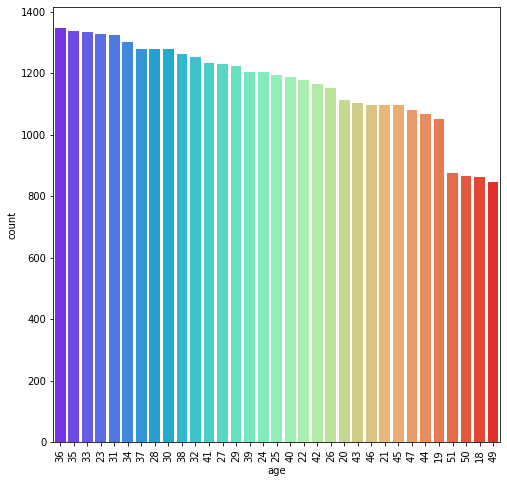

In [187]:
plt.figure(figsize=(8,8))
sns.countplot(x=data['age'],order=data['age'].value_counts().iloc[:33].index,palette='rainbow')
plt.xticks(rotation=90)
plt.show()

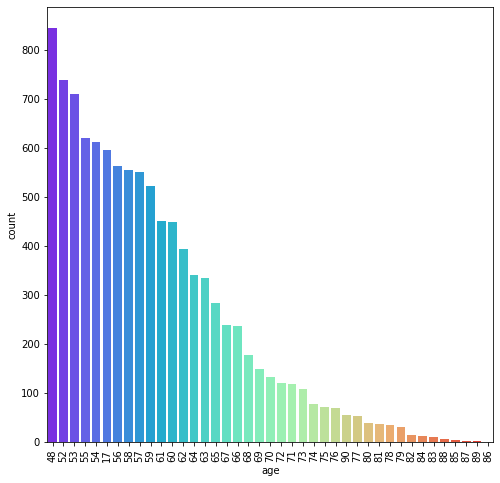

In [188]:
plt.figure(figsize=(8,8))
sns.countplot(x=data['age'],order=data['age'].value_counts().iloc[33:].index,palette='rainbow')
plt.xticks(rotation=90)
plt.show()

1. Most people are of age 36 i.e. 1348.
2. Least people are of age 86 i.e. 1.
3. Minimum age is 17 and maximum age is 90.

In [189]:
#To find outliers in the data

def iqr(data):
    outliers=[]
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    print("Lower limit is: ",Lower_tail)
    print("Upper limit is: ",Upper_tail)
    for i in data:
        if i > Upper_tail or i < Lower_tail:
            outliers.append(i)
    return outliers

<Figure size 576x576 with 0 Axes>

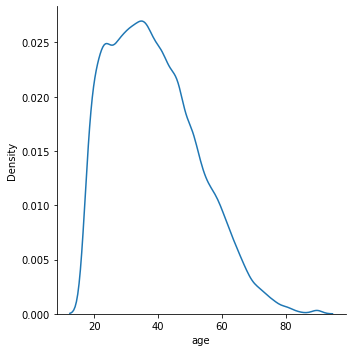

In [190]:
#Plotting the displot to see that the data is normally distributed or not

plt.figure(figsize=(8,8))
sns.displot(x=data['age'],kind='kde',palette='rainbow')

The data seems to be symmetric with some outliers.

In [191]:
print("The skewness of the data is: ",data['age'].skew())
print("The kurtosis of the data is: ",data['age'].kurtosis())

The skewness of the data is:  0.5575803166133181
The kurtosis of the data is:  -0.18426874062387766


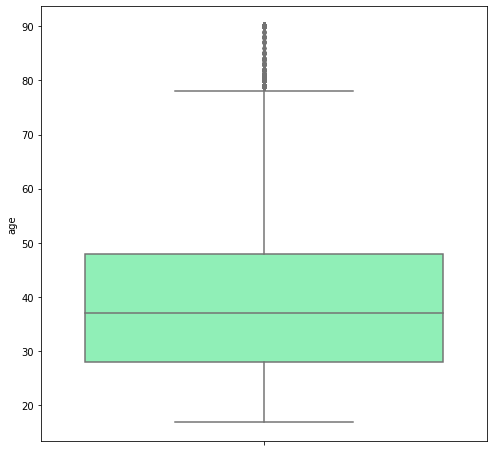

In [192]:
#plotting box plot to find outliers

plt.figure(figsize=(8,8))
sns.boxplot(y=data['age'],palette='rainbow')

1. Median age is 37.
2. We can see that there are many outliers in the data.

In [193]:
# Finding outliers in the data

age_outliers=iqr(data['age'])
print(len(age_outliers))
print(age_outliers)
print(min(age_outliers))

Lower limit is:  -2.0
Upper limit is:  78.0
216
[79, 80, 90, 79, 80, 81, 82, 83, 81, 85, 80, 90, 81, 84, 81, 89, 81, 83, 81, 82, 80, 90, 81, 83, 80, 90, 90, 84, 80, 80, 80, 81, 90, 85, 90, 81, 81, 80, 80, 79, 81, 80, 88, 87, 90, 79, 83, 79, 80, 90, 79, 79, 81, 81, 90, 82, 90, 87, 81, 88, 80, 81, 80, 81, 90, 88, 89, 84, 80, 80, 83, 79, 81, 79, 90, 80, 81, 90, 88, 90, 90, 80, 90, 81, 82, 79, 81, 80, 83, 90, 90, 79, 81, 90, 90, 80, 90, 90, 79, 79, 84, 90, 80, 90, 81, 83, 84, 81, 79, 85, 82, 79, 80, 90, 90, 90, 84, 80, 90, 90, 79, 84, 90, 79, 90, 90, 90, 82, 81, 90, 84, 79, 81, 82, 81, 80, 90, 80, 84, 82, 79, 90, 84, 90, 83, 79, 81, 80, 79, 80, 79, 80, 90, 90, 80, 90, 90, 81, 83, 82, 90, 90, 81, 80, 80, 90, 79, 80, 82, 85, 80, 79, 90, 81, 79, 80, 79, 81, 82, 88, 90, 82, 88, 84, 83, 79, 86, 90, 90, 82, 83, 81, 79, 90, 80, 81, 79, 84, 84, 79, 90, 80, 81, 81, 81, 90, 87, 90, 80, 80, 82, 90, 90, 85, 82, 81]
79


In [194]:
# Removing outliers in the data

data['age']=data[data['age']<79]

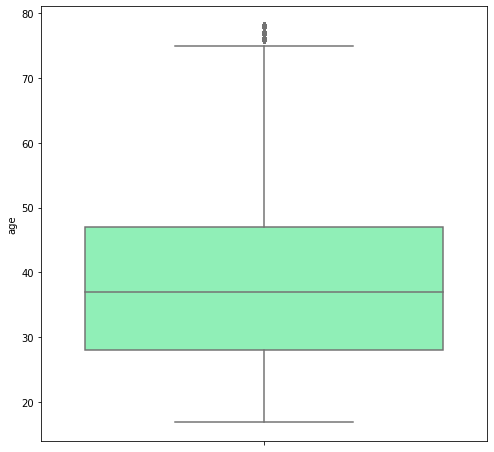

In [195]:
#Plotting box plot to see outliers

plt.figure(figsize=(8,8))
sns.boxplot(y=data['age'],palette='rainbow')

As, we can see we have removed most of the outliers from the data.

In [196]:
#To see how many null values are there in the data

data['age'].isnull().sum()

216

In [197]:
# Filling null values with median

data['age']=data['age'].fillna(data['age'].median())

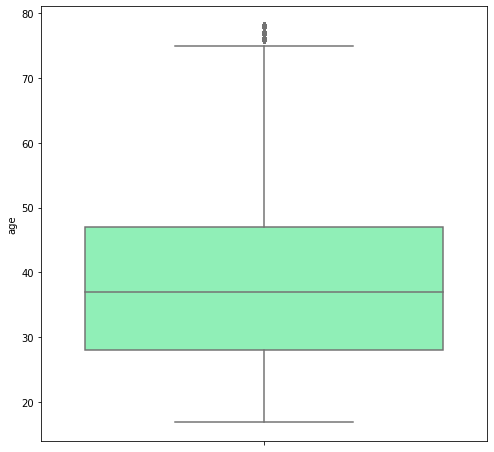

In [198]:
#Plotting box plot if there is any change in the data-set after inputing NaN values with median

plt.figure(figsize=(8,8))
sns.boxplot(y=data['age'],palette='rainbow')

There is no change in the data['age'] after inputing it with median.

In [199]:
data['age'].isnull().sum()

0

<Figure size 576x576 with 0 Axes>

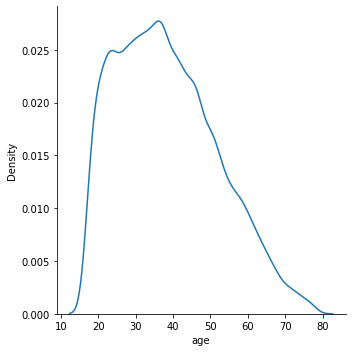

In [200]:
#Plotting the displot to see that the data is normally distributed or not

plt.figure(figsize=(8,8))
sns.displot(x=data['age'],kind='kde',palette='rainbow')

1. We can see that after removing the outliers and inputing nan values with median our symmetry of data has improved a lot.
2. Our distribution also looks preety much normally distribured.

In [201]:
print("The skewness of the data is: ",data['age'].skew())
print("The kurtosis of the data is: ",data['age'].kurtosis())

The skewness of the data is:  0.47364250219349596
The kurtosis of the data is:  -0.46248555460886154


### Analysing workclass

In [202]:
data['workclass'].describe()

count       48842
unique          9
top       Private
freq        33906
Name: workclass, dtype: object

In [203]:
#To see count of each unique values

data['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [204]:
data['workclass'].isnull().sum()

0

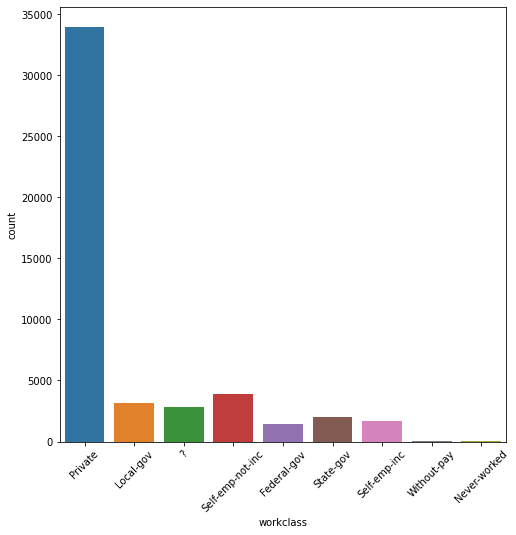

In [205]:
#Plotting countplot

plt.figure(figsize=(8,8))
sns.countplot(x=data['workclass'])
plt.xticks(rotation=45)
plt.show()

1. We can see most people are involved in the private sector i.e. 33906.
2. The are also missing value in the data '?'.

In [206]:
data['workclass']=data['workclass'].replace('?',np.nan)

In [207]:
data['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

**Rather than having so-much unique values we can incoperate them under two or three unique values.**

In [208]:
data['workclass'].replace(['Private','Self-emp-not-inc','Local-gov',np.nan,'State-gov','Self-emp-inc','Federal-gov','Without-pay','Never-worked'],
                          ['Private','inc','gov',np.nan,'gov','inc','gov','Without-pay','Never-worked'],inplace=True)

In [209]:
data['workclass'].value_counts()

Private         33906
gov              6549
inc              5557
Without-pay        21
Never-worked       10
Name: workclass, dtype: int64

In [210]:
data['workclass'].isnull().sum()

2799

In [211]:
mode=data['workclass'].mode()[0]

In [212]:
#Filling missing value with mode

data['workclass'].replace(np.nan,'Private',inplace=True)

In [213]:
data['workclass'].isnull().sum()

0

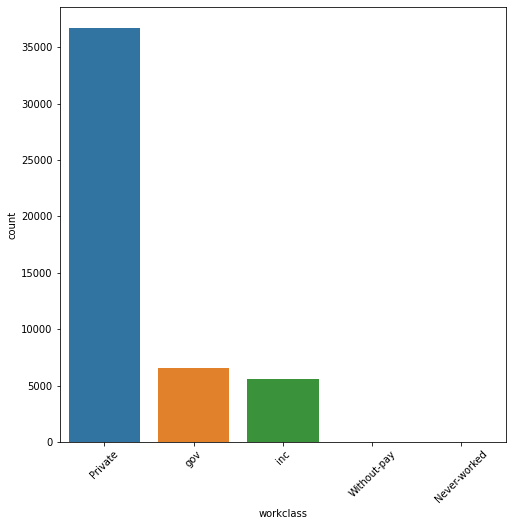

In [214]:
#Plotting countplot

plt.figure(figsize=(8,8))
sns.countplot(x=data['workclass'])
plt.xticks(rotation=45)
plt.show()

Now there are no missing values in the data.

### Analysing fnlwgt 

In [215]:
data['fnlwgt'].describe()

count     48842.000
mean     189664.135
std      105604.025
min       12285.000
25%      117550.500
50%      178144.500
75%      237642.000
max     1490400.000
Name: fnlwgt, dtype: float64

<Figure size 576x576 with 0 Axes>

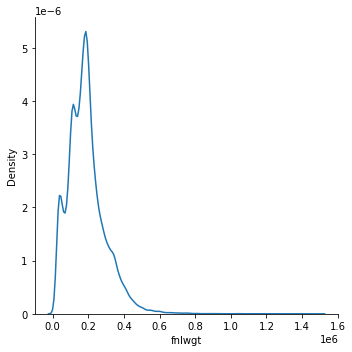

In [216]:
#Plotting the displot to see type off distibution

plt.figure(figsize=(8,8))
sns.displot(x=data['fnlwgt'],kind='kde')

The plot somewhat looks like log distribution as it has a very long tail

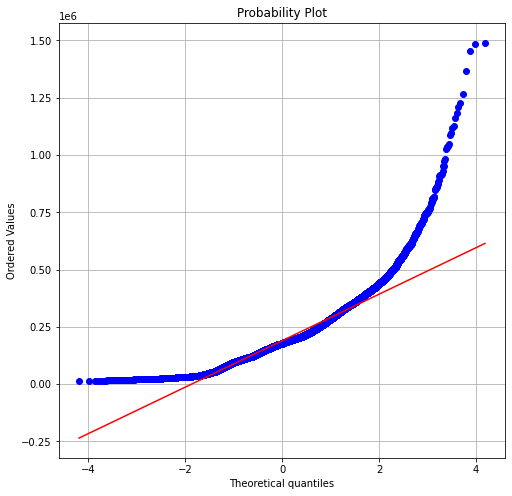

In [217]:
#Plotting q-q plot to check normality

plt.figure(figsize=(8,8))
stats.probplot(x=data['fnlwgt'],dist='norm',plot=plt)
plt.grid()

In [218]:
#Applying box-cox transformation as it helps to transforms log and pareto distribution into normal distribution

x_fr,l_fr=stats.boxcox(data['fnlwgt'])

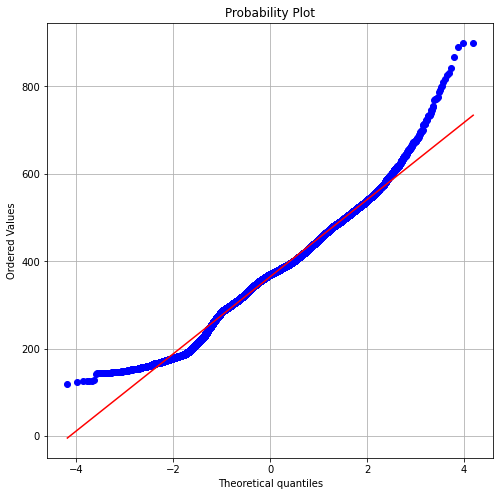

In [219]:
# After applying box-cox transformation, we can see that our data has transfofrmed a lot

plt.figure(figsize=(8,8))
stats.probplot(x=x_fr,dist='norm',plot=plt)
plt.grid()

<Figure size 576x576 with 0 Axes>

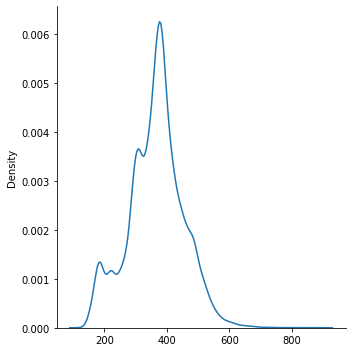

In [220]:
#Plotting the displot to see type off distibution

plt.figure(figsize=(8,8))
sns.displot(x=x_fr,kind='kde')

1. Now our data is very much symmetric.
2. It's kurtosis is also in acceptable range for normal distribution
3. But still some outliers can be seen.

In [221]:
#Mapping the transfromed values to the data['fnlwgt']

data['fnlwgt']=x_fr

In [222]:
print("The skewness of the transformed data: ",data['fnlwgt'].skew())
print("The Kurtosis of the transformed data: ",data['fnlwgt'].kurt())

The skewness of the transformed data:  0.01592087921227506
The Kurtosis of the transformed data:  0.44915652201807443


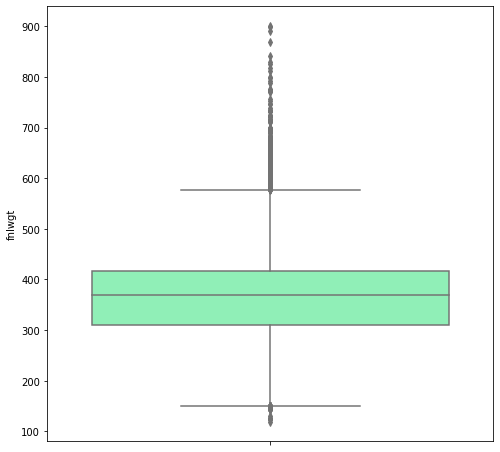

In [223]:
# Plotting box plot to see outlier

plt.figure(figsize=(8,8))
sns.boxplot(y=data['fnlwgt'],palette='rainbow')

1. There are many outliers present in the data.
2. Median value of the data is  178144.500

In [224]:
fnlwgt_outlier=iqr(data['fnlwgt'])
print(len(fnlwgt_outlier))
print('*'*127)
print(fnlwgt_outlier[:10])

Lower limit is:  150.20445351743018
Upper limit is:  577.3237984575715
534
*******************************************************************************************************************************
[587.2521176863625, 614.675782621246, 147.9299730498032, 589.7125850570018, 637.1920650194169, 603.5274595048623, 641.1309811433875, 627.7389606211937, 125.42837170530741, 628.9199759767463]


In [225]:
# Removing the outliers

data['fnlwgt']=data['fnlwgt'][(data['fnlwgt']>150.20445351743018) &(data['fnlwgt']<577.3237984575715)]

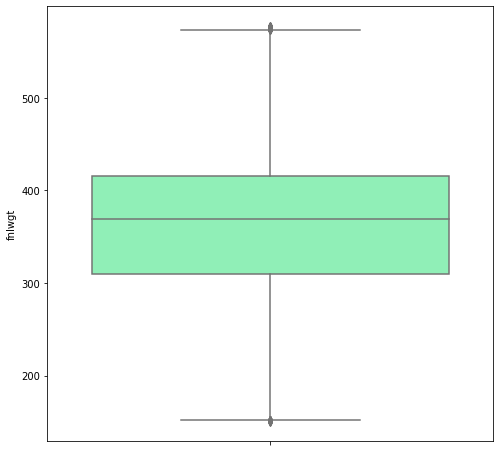

In [226]:
# Plotting box plot to see outlier

plt.figure(figsize=(8,8))
sns.boxplot(y=data['fnlwgt'],palette='rainbow')

We can now see that we have removed most of the outlier's from the data and the data is much cleaned.

In [227]:
data['fnlwgt'].fillna(data['fnlwgt'].median(),inplace=True)

<Figure size 576x576 with 0 Axes>

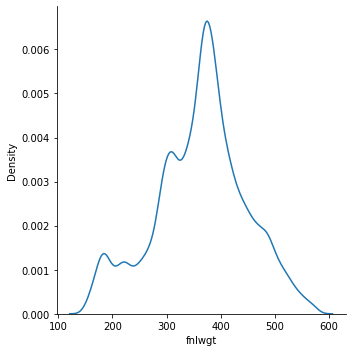

In [228]:
#Plotting the displot to see type off distibution

plt.figure(figsize=(8,8))
sns.displot(x=data['fnlwgt'],kind='kde')

After fully cleaning the data the symmetry and kurtosis have improved a lot.

In [229]:
print("The skewness of the transformed data: ",data['fnlwgt'].skew())
print("The Kurtosis of the transformed data: ",data['fnlwgt'].kurt())

The skewness of the transformed data:  -0.21371332520968342
The Kurtosis of the transformed data:  -0.10278577929043209


### Analysing education

In [230]:
data['education'].describe()

count       48842
unique         16
top       HS-grad
freq        15784
Name: education, dtype: object

In [231]:
data['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [232]:
data['education'].isnull().sum()

0

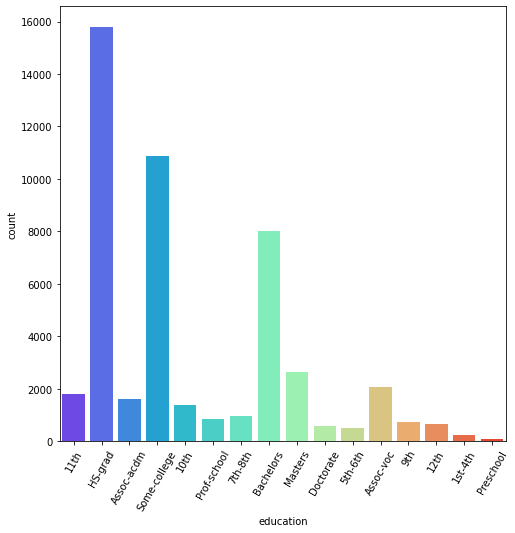

In [233]:
# Plotting the countplot

plt.figure(figsize=(8,8))
sns.countplot(x=data['education'],palette='rainbow')
plt.xticks(rotation=60)
plt.show()

1. Most of the people have completed HS-grad and some bacholers.
2. On the other there are also peope working who have just completed their pre-school, 1st-8th and they have not completed any higher education, which is a matter of concern.

### Analysing educational-num

In [234]:
data['educational-num'].describe()

count   48842.000
mean       10.078
std         2.571
min         1.000
25%         9.000
50%        10.000
75%        12.000
max        16.000
Name: educational-num, dtype: float64

In [235]:
data['educational-num'].unique()

array([ 7,  9, 12, 10,  6, 15,  4, 13, 14, 16,  3, 11,  5,  8,  2,  1])

In [236]:
data['educational-num'].value_counts()

9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: educational-num, dtype: int64

The column is same as education column and we have already analysed that, what we can do is we will drop the categorica column at thetime of model building and will utilize educational-num column. As, it is already mapped with numerical value in the perfect order.

### Analysing marital-status

In [237]:
data['marital-status'].describe()

count                  48842
unique                     7
top       Married-civ-spouse
freq                   22379
Name: marital-status, dtype: object

In [238]:
data['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [239]:
data['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [240]:
# As we can see that some of the categorical values are related, so we will club them

data['marital-status'].replace(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],['not-married','married','not-married','not-married','not-married','married','married'],inplace=True)

In [241]:
data['marital-status'].value_counts()

not-married    25798
married        23044
Name: marital-status, dtype: int64

In [242]:
data['marital-status'].isnull().sum()

0

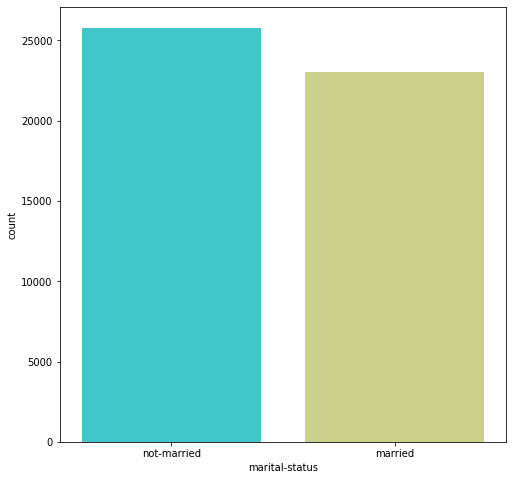

In [243]:
#Plotting the countpot

plt.figure(figsize=(8,8))
sns.countplot(x=data['marital-status'],palette='rainbow')

The data is preety much balanced with married cout of 23044 and not-married count of 25798.

### Analysing occupation

In [244]:
data['occupation'].describe()

count              48842
unique                15
top       Prof-specialty
freq                6172
Name: occupation, dtype: object

In [245]:
data['occupation'].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [246]:
data['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

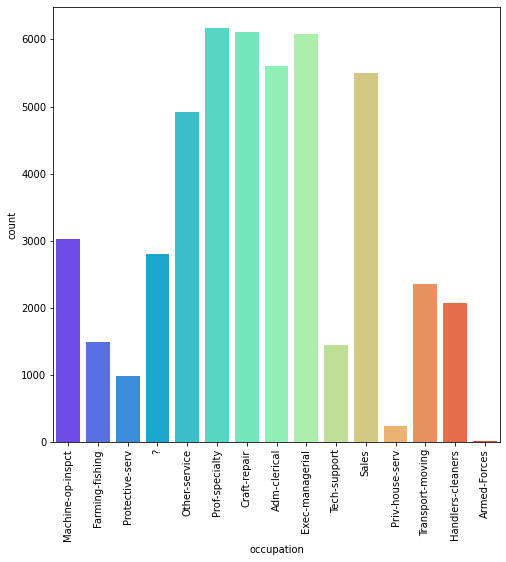

In [247]:
#Plotting the count plot

plt.figure(figsize=(8,8))
sns.countplot(x=data['occupation'],palette='rainbow')
plt.xticks(rotation=90)
plt.show()

1. Primary occupation of people are Prof-Speciality, Craft-repair, Exe-managerial and Sales.
2. There are also many missing values in the data "?"

In [248]:
data['occupation'].mode()[0]

'Prof-specialty'

In [249]:
#Imputing the missing values with mode

data['occupation'].replace('?','Prof-specialty',inplace=True)

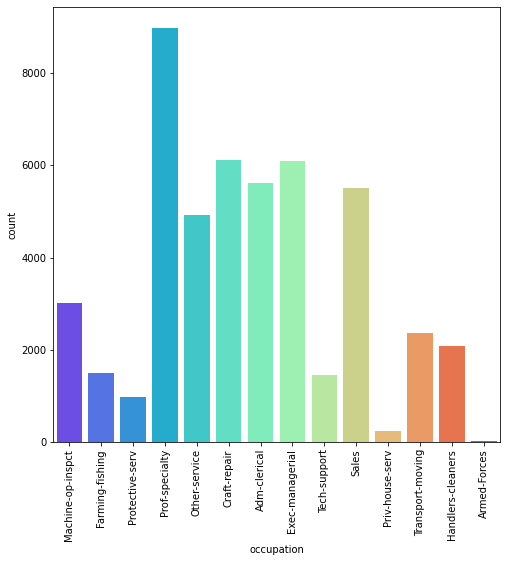

In [250]:
#Plotting the count plot

plt.figure(figsize=(8,8))
sns.countplot(x=data['occupation'],palette='rainbow')
plt.xticks(rotation=90)
plt.show()

Now there, are no missing values after imputing the missing values with mode.

### Analysing relationship

In [251]:
data['relationship'].describe()

count       48842
unique          6
top       Husband
freq        19716
Name: relationship, dtype: object

In [252]:
data['relationship'].unique()

array(['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife',
       'Other-relative'], dtype=object)

In [253]:
data['relationship'].value_counts()

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

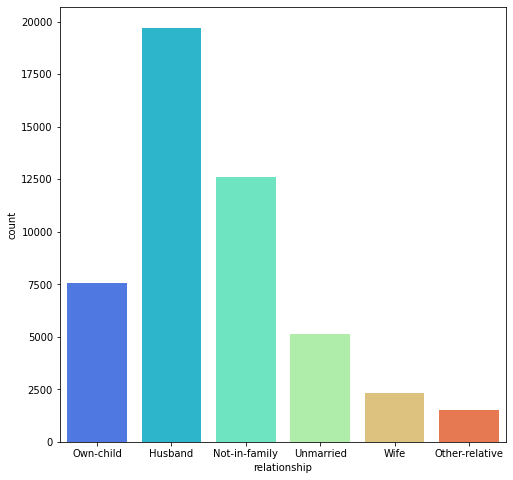

In [254]:
#Plotting the countplot

plt.figure(figsize=(8,8))
sns.countplot(x=data['relationship'],palette='rainbow')

Very frequent reationship is Husband.

### Analysing race

In [255]:
data['race'].describe()

count     48842
unique        5
top       White
freq      41762
Name: race, dtype: object

In [256]:
data['race'].unique()

array(['Black', 'White', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [257]:
data['race'].isnull().sum()

0

In [258]:
data['race'].value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

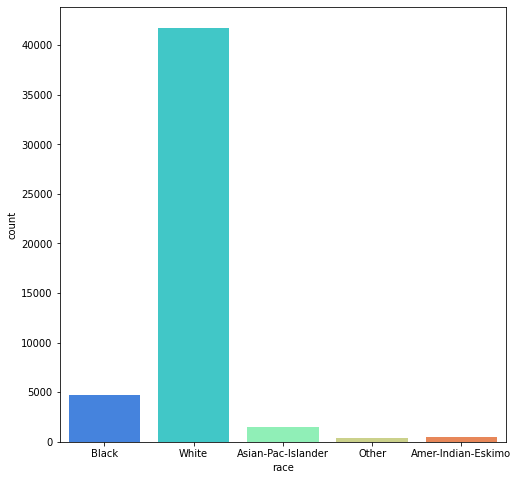

In [259]:
#Plotting countplot

plt.figure(figsize=(8,8))
sns.countplot(x=data['race'],palette='rainbow')

Clearly from the data it is visible that the dominating race in United States census dataset is White contrinution 85.5042791040498% of total.

In [260]:
print("% of white race people in the dataset: {}%".format(41762/data['race'].shape[0]*100))

% of white race people in the dataset: 85.5042791040498%


### Analysing gender

In [261]:
data['gender'].describe()

count     48842
unique        2
top        Male
freq      32650
Name: gender, dtype: object

In [262]:
data['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [263]:
data['gender'].isnull().sum()

0

In [264]:
data['gender'].value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

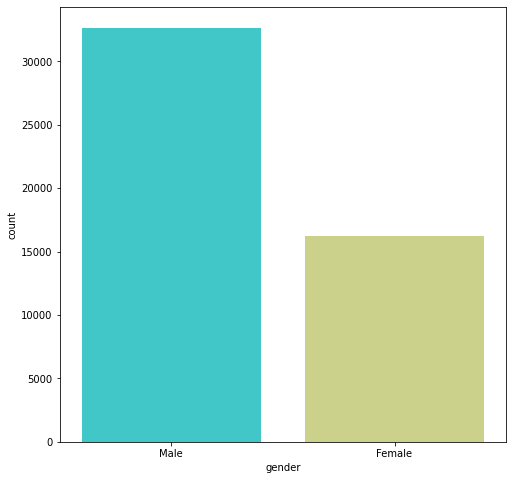

In [265]:
#Plotting the count-plot

plt.figure(figsize=(8,8))
sns.countplot(x=data['gender'],palette='rainbow')

Dominating gender in the dataset is male i.e. 66.84820441423365% of total.

In [266]:
print(f"% of male {32650/data['gender'].shape[0]*100}%")

% of male 66.84820441423365%


### Analysing capital-gain 

In [267]:
data['capital-gain'].describe()

count   48842.000
mean     1079.068
std      7452.019
min         0.000
25%         0.000
50%         0.000
75%         0.000
max     99999.000
Name: capital-gain, dtype: float64

In [268]:
data['capital-gain'].unique()

array([    0,  7688,  3103,  6418,  7298,  3908, 14084,  5178, 15024,
       99999,  2597,  2907,  4650,  6497,  1055,  5013, 27828,  4934,
        4064,  3674,  2174, 10605,  3418,   114,  2580,  3411,  4508,
        4386,  8614, 13550,  6849,  2463,  3137,  2885,  2964,  1471,
       10566,  2354,  1424,  1455,  3325,  4416, 25236,   594,  2105,
        4787,  2829,   401,  4865,  1264,  1506, 10520,  3464,  2653,
       20051,  4101,  1797,  2407,  3471,  1086,  1848, 14344,  1151,
        2993,  2290, 15020,  9386,  2202,  3818,  2176,  5455, 11678,
        7978,  7262,  6514, 41310,  3456,  7430,  2414,  2062, 34095,
        1831,  6723,  5060, 15831,  2977,  2346,  3273,  2329,  9562,
        2635,  4931,  1731,  6097,   914,  7896,  5556,  1409,  3781,
        3942,  2538,  3887, 25124,  7443,  5721,  1173,  4687,  6612,
        6767,  2961,   991,  2036,  2936,  2050,  1111,  2228, 22040,
        3432,  6360,  2009,  1639, 18481,  2387])

In [269]:
# The value 99999 appears to be nan let's replace it with median of the data as it is very different from the data values.

data['capital-gain'].replace(99999,data['capital-gain'].median(0),inplace=True)

In [270]:
data['capital-gain'].isnull().sum()

0

In [271]:
data['capital-gain'].value_counts()

0        45051
15024      513
7688       410
7298       364
3103       152
5178       146
5013       117
4386       108
8614        82
3325        81
2174        74
10520       64
4650        63
27828       58
4064        54
594         52
3137        51
14084       49
20051       49
13550       42
3908        42
2829        42
6849        42
1055        37
4787        35
3411        34
14344       34
3464        33
2597        31
9386        31
2176        31
2885        30
4101        29
2202        28
2407        25
4865        25
1506        24
4416        24
4508        23
3674        22
2354        21
2580        20
10605       19
2907        18
5455        18
3942        18
6418        16
3781        16
6497        15
2463        15
7430        15
2105        15
25236       14
2635        14
2964        14
1151        13
2977        11
3471        11
3818        11
2653        11
1797        10
15020       10
6514        10
2414        10
2290        10
4934        10
1409      

<Figure size 576x576 with 0 Axes>

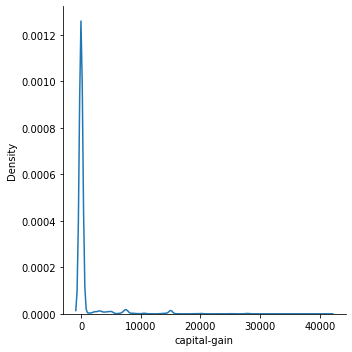

In [272]:
# Plotting the displot

plt.figure(figsize=(8,8))
sns.displot(x=data['capital-gain'],kind='kde')

The graph appears to be a pareto distribution.

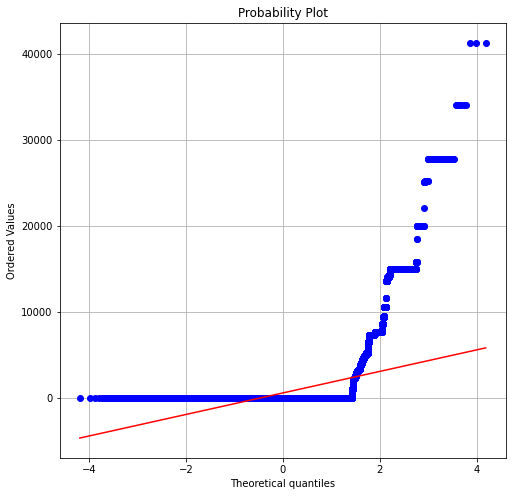

In [273]:
#Plotting q-q plot

plt.figure(figsize=(8,8))
stats.probplot(x=data['capital-gain'],dist='norm',plot=plt)
plt.grid()

In [274]:
data['capital-gain'].head()

0       0
1       0
2       0
3    7688
4       0
Name: capital-gain, dtype: int64

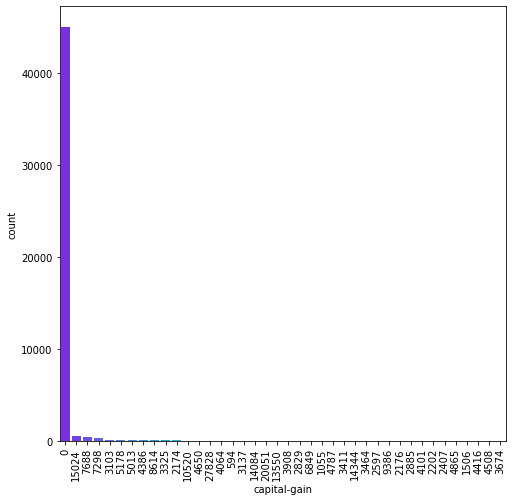

In [275]:
#Plotting the countplot

plt.figure(figsize=(8,8))
sns.countplot(x=data['capital-gain'],order=data['capital-gain'].value_counts().iloc[:40].index,palette='rainbow')
plt.xticks(rotation=90)
plt.show()

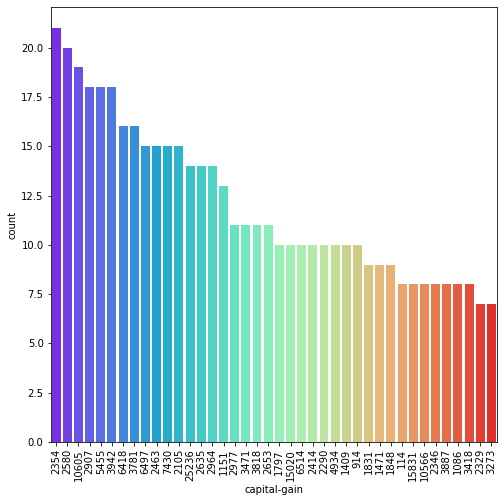

In [276]:
#Plotting the countplot

plt.figure(figsize=(8,8))
sns.countplot(x=data['capital-gain'],order=data['capital-gain'].value_counts().iloc[40:80].index,palette='rainbow')
plt.xticks(rotation=90)
plt.show()

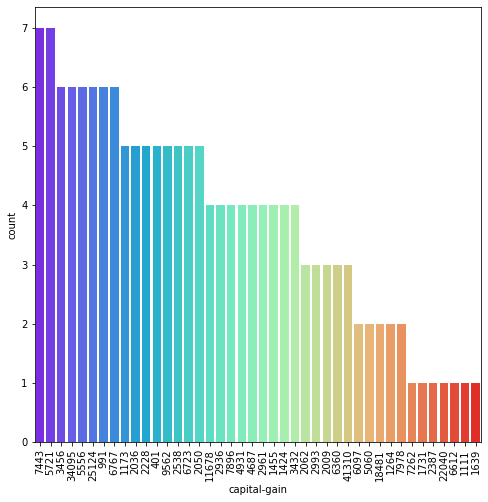

In [277]:
#Plotting the countplot

plt.figure(figsize=(8,8))
sns.countplot(x=data['capital-gain'],order=data['capital-gain'].value_counts().iloc[80:].index,palette='rainbow')
plt.xticks(rotation=90)
plt.show()

Most of the people had 0 capital gain.

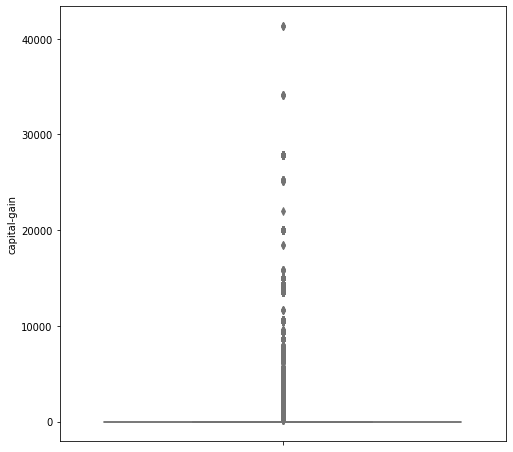

In [278]:
#Plotting boxplot

plt.figure(figsize=(8,8))
sns.boxplot(y=data['capital-gain'],palette='rainbow')

### Analysing capital-loss

In [279]:
data['capital-loss'].describe()

count   48842.000
mean       87.502
std       403.005
min         0.000
25%         0.000
50%         0.000
75%         0.000
max      4356.000
Name: capital-loss, dtype: float64

In [280]:
data['capital-loss'].unique()

array([   0, 1721, 1876, 2415, 1887,  625, 1977, 2057, 1429, 1590, 1485,
       2051, 2377, 1672, 1628, 1902, 1602, 1741, 2444, 1408, 2001, 2042,
       1740, 1825, 1848, 1719, 3004, 2179, 1573, 2205, 1258, 2339, 1726,
       2258, 1340, 1504, 2559, 1668, 1974, 1980, 1564, 2547, 2002, 1669,
       1617,  323, 3175, 2472, 2174, 1579, 2129, 1510, 1735, 2282, 1870,
       1411, 1911, 1651, 1092, 1762, 2457, 2231, 2238,  653, 1138, 2246,
       2603, 2392, 1944, 1380, 2465, 1421, 3770, 1594,  213, 2149, 2824,
       1844, 2467, 2163, 1816, 1648, 2206, 2352,  419, 1539,  880,  810,
        974, 4356, 2489, 1755, 3683, 2267, 2080,  155, 3900, 2201, 2754])

In [281]:
data['capital-loss'].value_counts()

0       46560
1902      304
1977      253
1887      233
2415       72
1485       71
1848       67
1590       62
1602       62
1876       59
1740       58
1672       50
1741       44
1564       43
2258       39
1719       38
1980       36
2001       35
1408       35
1669       35
2002       33
1579       30
2051       29
1974       28
1721       28
2339       27
1504       26
2377       25
1628       24
1762       20
2444       20
2179       20
2205       19
2559       17
625        17
2057       16
2824       14
1573       12
2042       12
1651       11
1092       11
1617       11
2392       11
1340       11
1380       10
2174       10
1668        9
1594        9
1726        9
2246        8
2603        7
2129        7
2231        7
2206        6
880         6
1258        6
1825        5
3004        5
323         5
213         5
2149        5
2547        5
2472        4
2457        4
1816        4
3770        4
1138        4
653         4
2238        4
1411        4
4356        3
419   

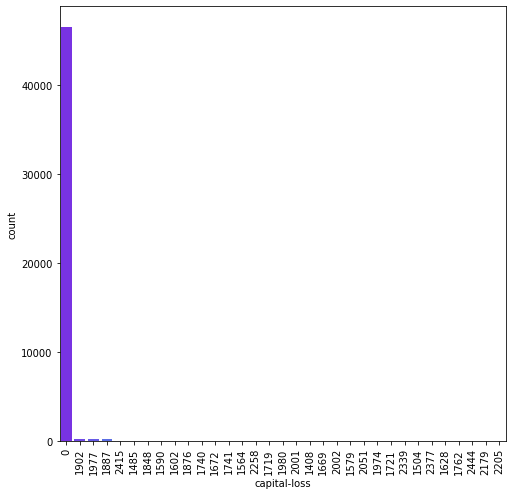

In [282]:
#Plotting the countplot

plt.figure(figsize=(8,8))
sns.countplot(x=data['capital-loss'],order=data['capital-loss'].value_counts().iloc[:33].index,palette='rainbow')
plt.xticks(rotation=90)
plt.show()

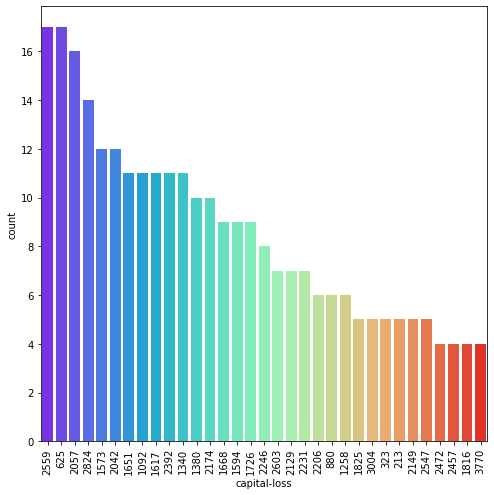

In [283]:
#Plotting the countplot

plt.figure(figsize=(8,8))
sns.countplot(x=data['capital-loss'],order=data['capital-loss'].value_counts().iloc[33:66].index,palette='rainbow')
plt.xticks(rotation=90)
plt.show()

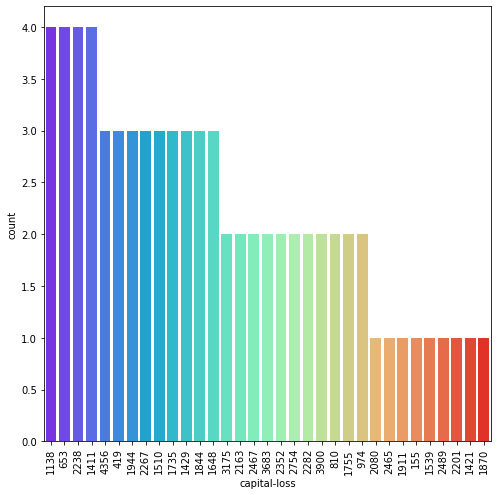

In [284]:
#Plotting the countplot

plt.figure(figsize=(8,8))
sns.countplot(x=data['capital-loss'],order=data['capital-loss'].value_counts().iloc[66:].index,palette='rainbow')
plt.xticks(rotation=90)
plt.show()

Most of the people had 0 capital-loss.

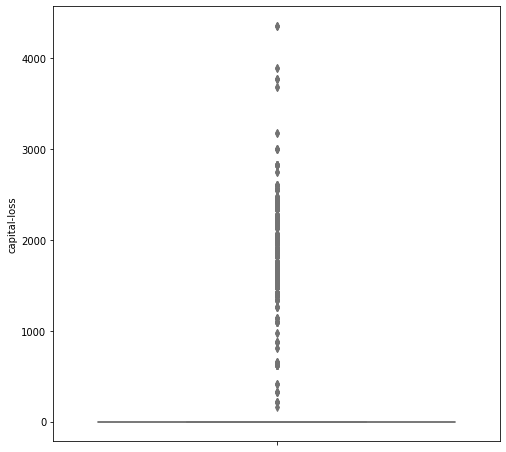

In [285]:
#Plotting boxplot

plt.figure(figsize=(8,8))
sns.boxplot(y=data['capital-loss'],palette='rainbow')

### Analysing hours per week

In [286]:
data['hours-per-week'].describe()

count   48842.000
mean       40.422
std        12.391
min         1.000
25%        40.000
50%        40.000
75%        45.000
max        99.000
Name: hours-per-week, dtype: float64

In [287]:
data['hours-per-week'].unique()

array([40, 50, 30, 32, 10, 39, 35, 48, 25, 20, 45, 47,  6, 43, 90, 54, 60,
       38, 36, 18, 24, 44, 56, 28, 16, 41, 22, 55, 14, 33, 37,  8, 12, 70,
       15, 75, 52, 84, 42, 80, 68, 99, 65,  5, 17, 72, 53, 29, 96, 21, 46,
        3,  1, 23, 49, 67, 76,  7,  2, 58, 26, 34,  4, 51, 78, 63, 31, 92,
       77, 27, 85, 13, 19, 98, 62, 66, 57, 11, 86, 59,  9, 64, 73, 61, 88,
       79, 89, 74, 69, 87, 97, 94, 82, 91, 81, 95])

In [288]:
data['hours-per-week'].isnull().sum()

0

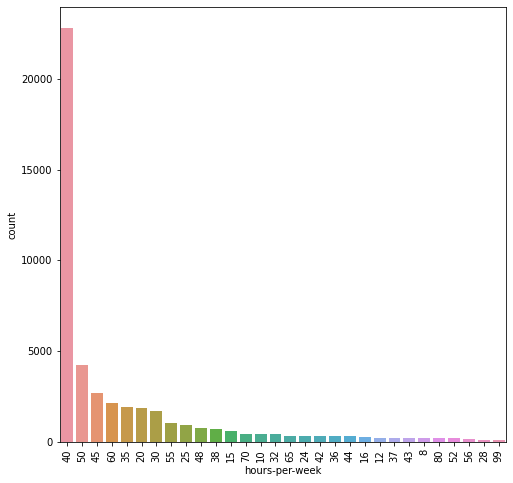

In [289]:
# Plotting count plot

plt.figure(figsize=(8,8))
sns.countplot(x=data['hours-per-week'],order=data['hours-per-week'].value_counts().iloc[:30].index)
plt.xticks(rotation=90)
plt.show()

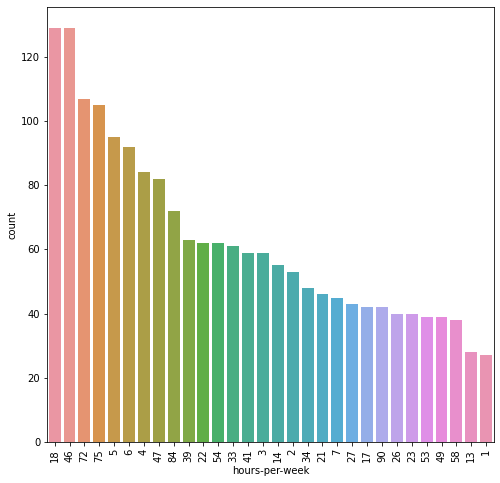

In [290]:
plt.figure(figsize=(8,8))
sns.countplot(x=data['hours-per-week'],order=data['hours-per-week'].value_counts().iloc[30:60].index)
plt.xticks(rotation=90)
plt.show()

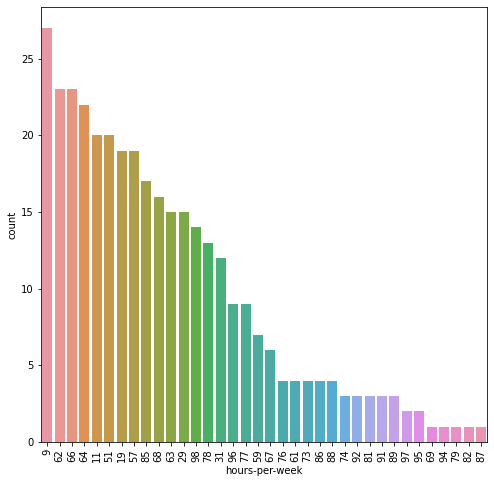

In [291]:
plt.figure(figsize=(8,8))
sns.countplot(x=data['hours-per-week'],order=data['hours-per-week'].value_counts().iloc[60:].index)
plt.xticks(rotation=90)
plt.show()

Most of the people work for 40 hours

<Figure size 576x576 with 0 Axes>

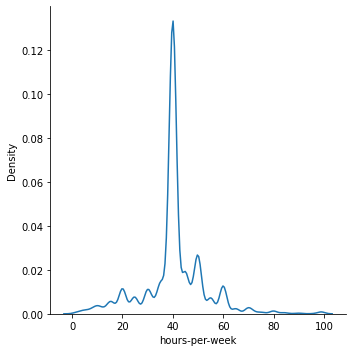

In [292]:
# Ploting the displot

plt.figure(figsize=(8,8))
sns.displot(x=data['hours-per-week'],kind='kde')

1. The data is preety much symmetric.
2. There are some outliers present in the data

In [293]:
print("The skewness of the data is: ",data['hours-per-week'].skew())
print("The kurtosis of the data is: ",data['hours-per-week'].kurt())

The skewness of the data is:  0.23874965720275756
The kurtosis of the data is:  2.9510590898442954


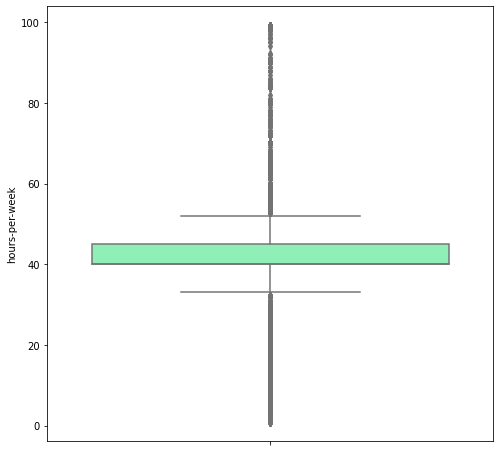

In [294]:
#Plotting box-plot to see the outliers

plt.figure(figsize=(8,8))
sns.boxplot(y=data['hours-per-week'],palette='rainbow')

In [295]:
hours_outliers=iqr(data['hours-per-week'])
print(hours_outliers)

Lower limit is:  32.5
Upper limit is:  52.5
[30, 30, 32, 10, 25, 30, 20, 6, 90, 20, 54, 60, 32, 18, 20, 24, 60, 54, 60, 20, 30, 10, 56, 10, 25, 20, 10, 18, 28, 16, 28, 20, 24, 60, 25, 30, 25, 60, 60, 22, 55, 30, 30, 30, 30, 14, 32, 20, 25, 30, 16, 25, 60, 55, 8, 55, 54, 20, 55, 12, 32, 32, 30, 60, 28, 60, 12, 32, 20, 70, 15, 20, 25, 30, 20, 75, 24, 60, 25, 55, 55, 32, 60, 16, 60, 84, 60, 25, 15, 60, 20, 55, 80, 30, 12, 84, 80, 60, 25, 25, 70, 60, 8, 68, 10, 15, 99, 55, 60, 16, 20, 25, 65, 55, 24, 70, 25, 30, 20, 20, 55, 5, 60, 60, 20, 55, 65, 60, 20, 10, 75, 20, 32, 28, 17, 30, 28, 60, 60, 55, 60, 10, 10, 65, 18, 60, 72, 12, 60, 30, 60, 20, 60, 60, 25, 60, 25, 8, 60, 54, 65, 30, 80, 30, 20, 28, 55, 55, 60, 56, 30, 30, 53, 10, 60, 30, 10, 25, 25, 20, 20, 20, 25, 55, 20, 32, 10, 29, 32, 75, 24, 20, 20, 70, 55, 55, 30, 25, 10, 80, 60, 16, 25, 65, 60, 60, 96, 25, 20, 55, 30, 28, 60, 55, 28, 21, 8, 60, 60, 15, 20, 10, 30, 25, 90, 15, 5, 16, 25, 60, 25, 25, 55, 10, 30, 8, 18, 3, 16, 20, 30, 

In [296]:
#Removing the outliers

data['hours-per-week']=data[(data['hours-per-week']> 32.5) & (data['hours-per-week']<52.5)]

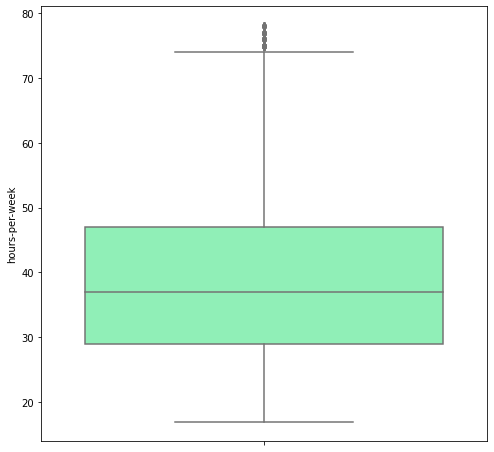

In [297]:
#Plotting box-plot to see the outliers

plt.figure(figsize=(8,8))
sns.boxplot(y=data['hours-per-week'],palette='rainbow')

Most of the outliers have been removed.

In [298]:
data['hours-per-week'].isnull().sum()

13496

In [299]:
data['hours-per-week']=data['hours-per-week'].fillna(data['hours-per-week'].median())

In [300]:
data['hours-per-week'].isnull().sum()

0

<Figure size 576x576 with 0 Axes>

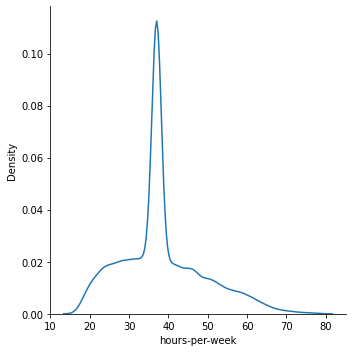

In [301]:
# Ploting the displot

plt.figure(figsize=(8,8))
sns.displot(x=data['hours-per-week'],kind='kde')

After cleaning the data this is what out plot loos like.

In [302]:
print("The skewness of the data is: ",data['hours-per-week'].skew())
print("The kurtosis of the data is: ",data['hours-per-week'].kurt())

The skewness of the data is:  0.6315409245676126
The kurtosis of the data is:  0.5025233699707079


 ### Analysing native-country

In [303]:
data['native-country'].describe()

count             48842
unique               42
top       United-States
freq              43832
Name: native-country, dtype: object

In [304]:
data['native-country'].unique()

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [305]:
data['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

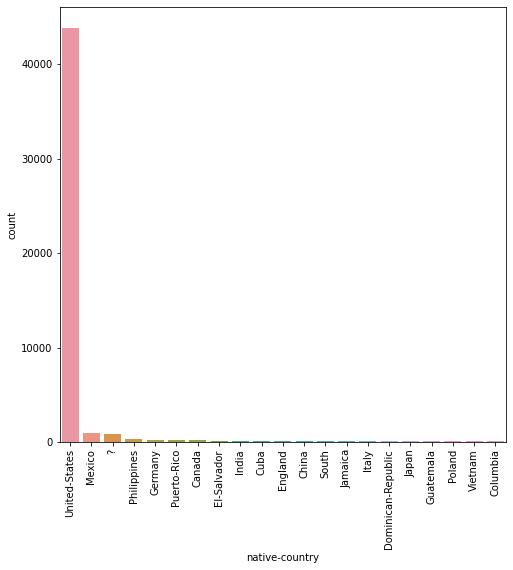

In [306]:
#Plotting the count-plot

plt.figure(figsize=(8,8))
sns.countplot(x=data['native-country'],order=data['native-country'].value_counts().iloc[:21].index)
plt.xticks(rotation=90)
plt.show()

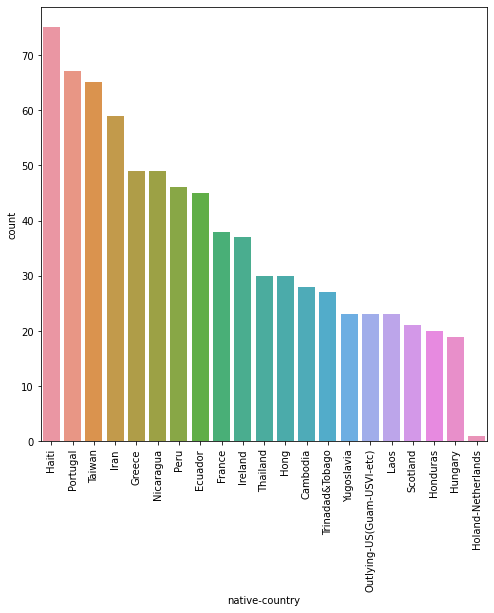

In [307]:
plt.figure(figsize=(8,8))
sns.countplot(x=data['native-country'],order=data['native-country'].value_counts().iloc[21:].index)
plt.xticks(rotation=90)
plt.show()

1. Mostly people are from United States.
2. There are also many lissing values in the dataset represented by '?'

In [308]:
# Finding mode value from the data

data['native-country'].mode()[0]

'United-States'

In [309]:
data['native-country'].replace("?",'United-States',inplace=True)

In [310]:
data['native-country'].unique()

array(['United-States', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

Now there are no nan values in the dataset.

### Analysing income

In [311]:
data['income'].describe()

count     48842
unique        2
top       <=50K
freq      37155
Name: income, dtype: object

In [312]:
data['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [313]:
data['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [314]:
data['income'].isnull().sum()

0

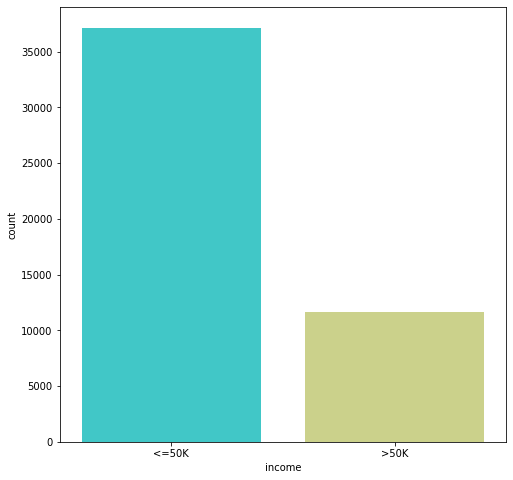

In [315]:
#PLotting the coun-plot

plt.figure(figsize=(8,8))
sns.countplot(x=data['income'],palette='rainbow')

Most of the people have an income less than 50K.

In [316]:
# Mapping the categorical variables

data['income']=data['income'].map({'<=50K':0,'>50K':1})

In [317]:
data['income'].value_counts()

0    37155
1    11687
Name: income, dtype: int64

## Bivariate Analysis

<Figure size 576x576 with 0 Axes>

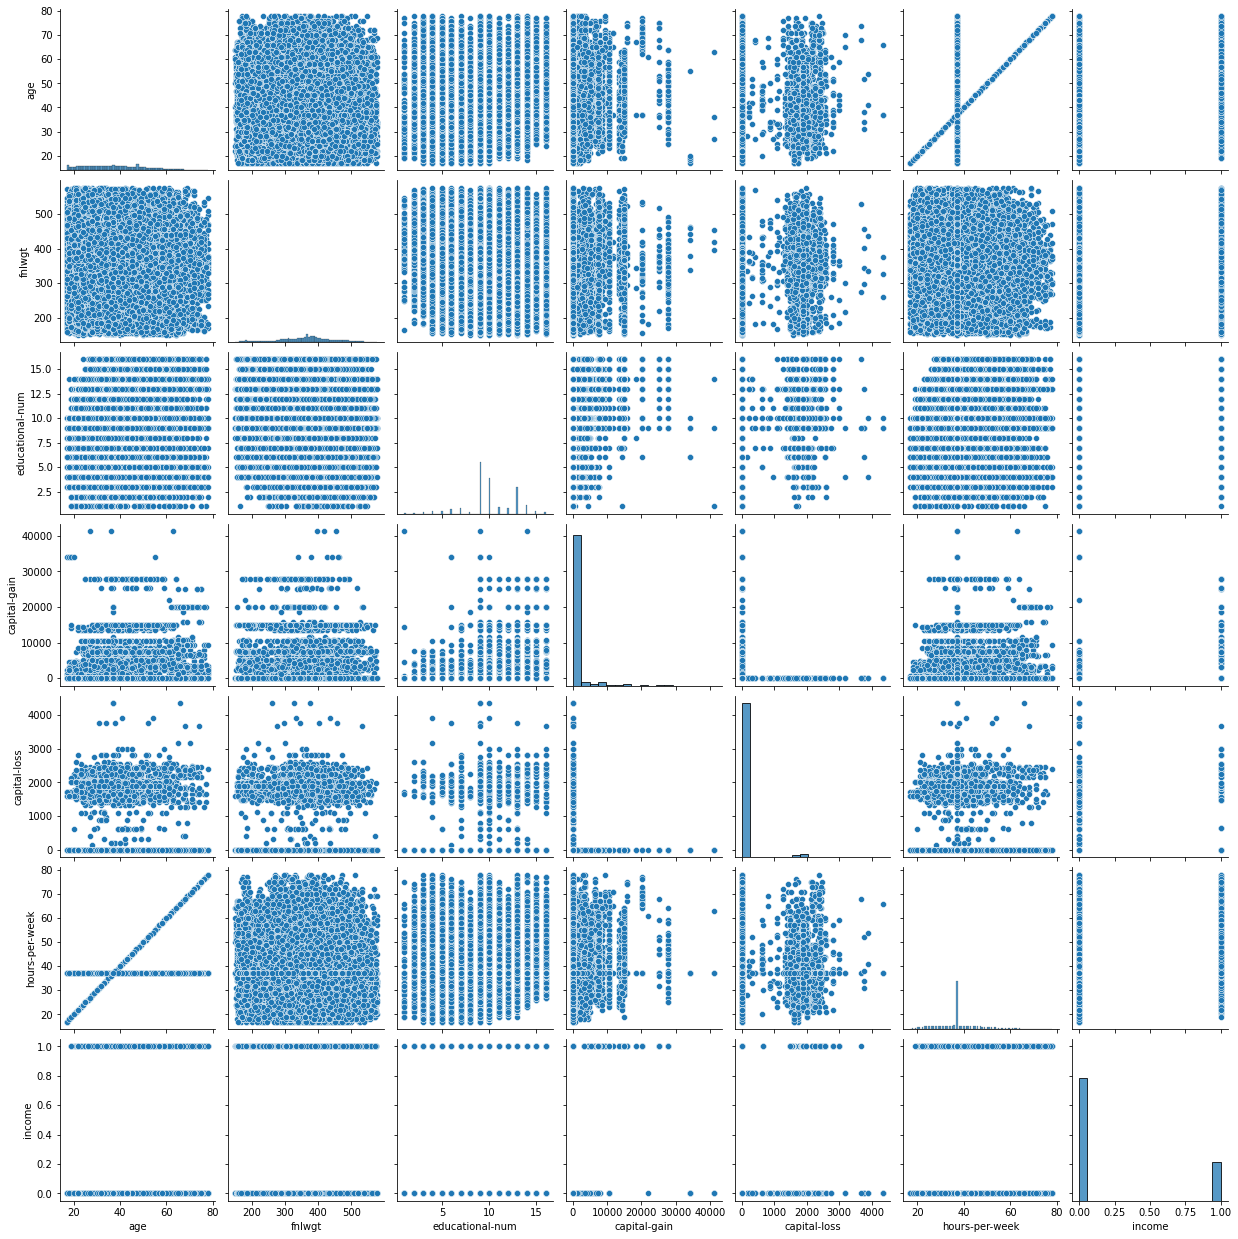

In [318]:
# Making pairplot

plt.figure(figsize=(8,8))
sns.pairplot(data)

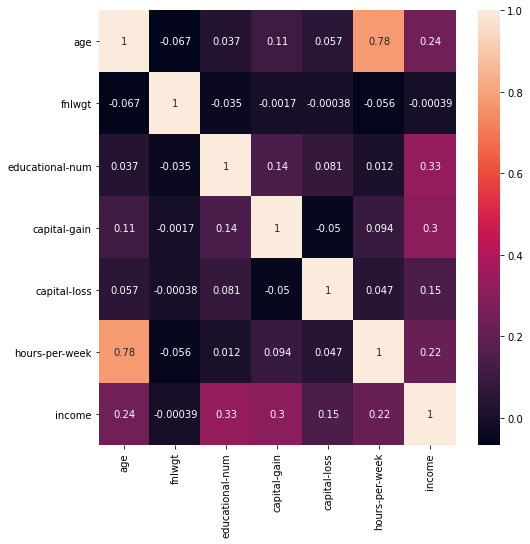

In [319]:
# Plotting heatmap to find correlation

plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True)

We can see that there is strong-correlation between hours-per-week and age.

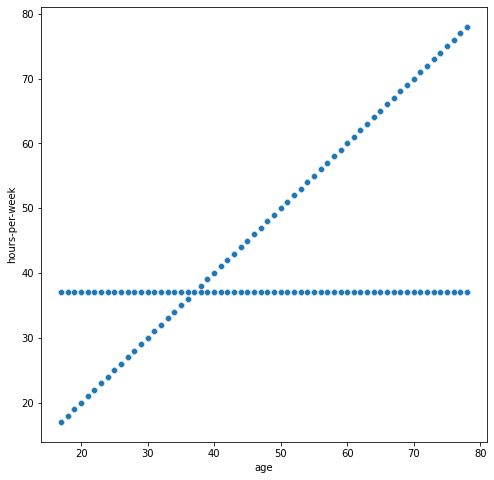

In [320]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=data['age'],y=data['hours-per-week'],palette='rainbow')

In [321]:
pd.crosstab(data['gender'],data['income'])

income,0,1
gender,,
Female,14423,1769
Male,22732,9918


The males are more in number in making income of greater than 50K.

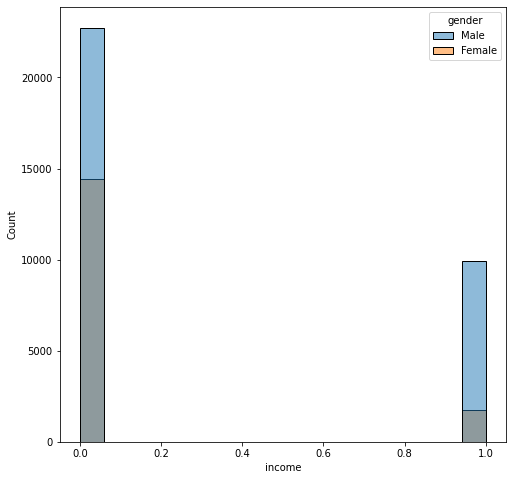

In [322]:
#Plotting histogram

plt.figure(figsize=(8,8))
sns.histplot(x=data['income'],hue=data['gender'])

In [323]:
pd.crosstab(data['hours-per-week'],data['income'])

income,0,1
hours-per-week,,
17.000,94,0
18.000,233,0
19.000,439,1
20.000,587,1
21.000,666,5
22.000,722,10
23.000,867,17
24.000,864,33
25.000,898,61


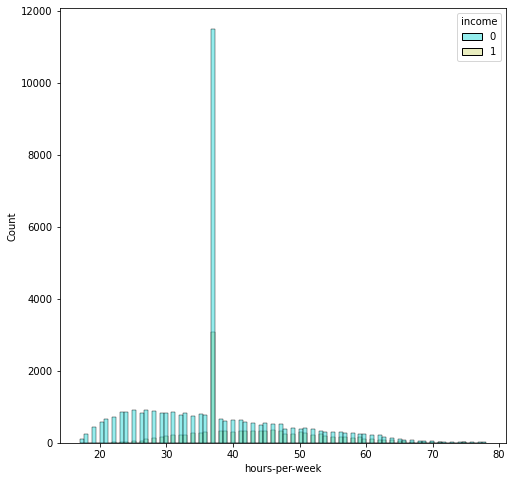

In [324]:
plt.figure(figsize=(8,8))
sns.histplot(x=data['hours-per-week'],hue=data['income'],palette='rainbow')

1. Mostly people work for 37 hours per week.
2. People working for same number of hours, some make more money and some less.

In [325]:
pd.crosstab(data['age'],data['income'])

income,0,1
age,,
17.000,595,0
18.000,862,0
19.000,1050,3
20.000,1112,1
21.000,1090,6
22.000,1161,17
23.000,1307,22
24.000,1162,44
25.000,1119,76


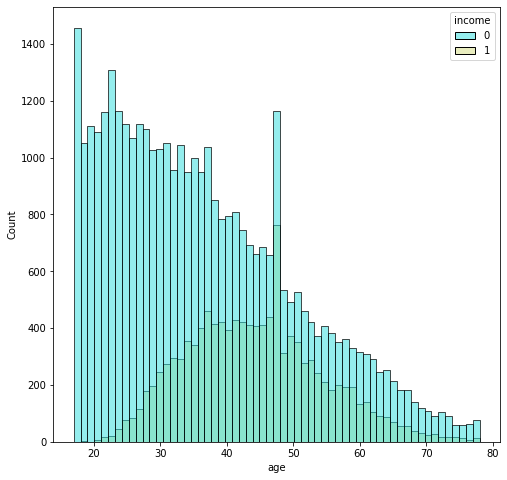

In [326]:
plt.figure(figsize=(8,8))
sns.histplot(x=data['age'],hue=data['income'],palette='rainbow')

People making above 50K are mostly of age 47.

In [327]:
pd.crosstab(data['race'],data['income'])

income,0,1
race,,
Amer-Indian-Eskimo,415,55
Asian-Pac-Islander,1110,409
Black,4119,566
Other,356,50
White,31155,10607


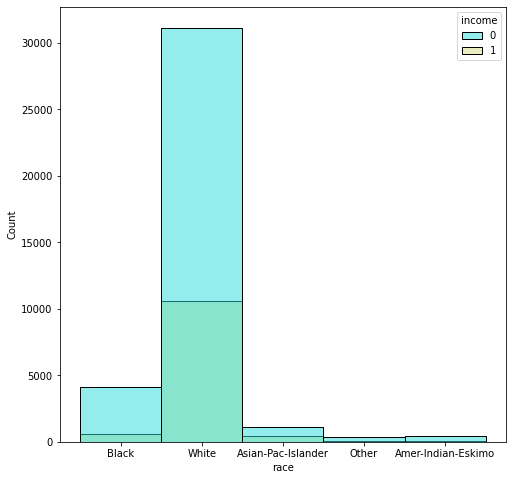

In [328]:
plt.figure(figsize=(8,8))
sns.histplot(x=data['race'],hue=data['income'],palette='rainbow')

1. White is a dominating race in earning more than 50k as well asless than 50k
2. White dominating in both the income bracket is due to their large population.

In [329]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25.000,Private,409.060,11th,7,not-married,Machine-op-inspct,Own-child,Black,Male,0,0,25.000,United-States,0
1,38.000,Private,277.151,HS-grad,9,married,Farming-fishing,Husband,White,Male,0,0,38.000,United-States,0
2,28.000,gov,482.959,Assoc-acdm,12,married,Protective-serv,Husband,White,Male,0,0,28.000,United-States,1
3,44.000,Private,353.613,Some-college,10,married,Machine-op-inspct,Husband,Black,Male,7688,0,44.000,United-States,1
4,18.000,Private,294.191,Some-college,10,not-married,Prof-specialty,Own-child,White,Female,0,0,37.000,United-States,0


In [330]:
#Dropping capital-gain and capital-loss

data.drop(['capital-gain','capital-loss'],axis=1,inplace=True)

In [331]:
#Dropping noe more column and mapping the marital status column

data.drop(['education'],axis=1,inplace=True)
data['marital-status']=data['marital-status'].map({'not-married':0,'married':1})

In [332]:
# Mapping the gender column
#Dropping native country and racedata.drop(['education'],axis=1,inplace=True)
data.drop(['race','native-country'],axis=1,inplace=True)
data['gender']=data['gender'].map({'Male':0,'Female':1})

In [333]:
data['relationship'].value_counts()

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

In [334]:
data.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,gender,hours-per-week,income
0,25.000,Private,409.060,7,0,Machine-op-inspct,Own-child,0,25.000,0
1,38.000,Private,277.151,9,1,Farming-fishing,Husband,0,38.000,0
2,28.000,gov,482.959,12,1,Protective-serv,Husband,0,28.000,1
3,44.000,Private,353.613,10,1,Machine-op-inspct,Husband,0,44.000,1
4,18.000,Private,294.191,10,0,Prof-specialty,Own-child,1,37.000,0


In [335]:
#Doing one hot-encoding

data=pd.get_dummies(data,drop_first=True)

In [336]:
data.head()

,age,fnlwgt,educational-num,marital-status,gender,hours-per-week,income,workclass_Private,workclass_Without-pay,workclass_gov,workclass_inc,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25.000,409.060,7,0,0,25.000,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,38.000,277.151,9,1,0,38.000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,28.000,482.959,12,1,0,28.000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,44.000,353.613,10,1,0,44.000,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,18.000,294.191,10,0,1,37.000,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [337]:
data.isnull().sum()

age                             0
fnlwgt                          0
educational-num                 0
marital-status                  0
gender                          0
hours-per-week                  0
income                          0
workclass_Private               0
workclass_Without-pay           0
workclass_gov                   0
workclass_inc                   0
occupation_Armed-Forces         0
occupation_Craft-repair         0
occupation_Exec-managerial      0
occupation_Farming-fishing      0
occupation_Handlers-cleaners    0
occupation_Machine-op-inspct    0
occupation_Other-service        0
occupation_Priv-house-serv      0
occupation_Prof-specialty       0
occupation_Protective-serv      0
occupation_Sales                0
occupation_Tech-support         0
occupation_Transport-moving     0
relationship_Not-in-family      0
relationship_Other-relative     0
relationship_Own-child          0
relationship_Unmarried          0
relationship_Wife               0
dtype: int64

In [355]:
# Splitting the data into features and target

x=data.drop(['income'],axis=1)
y=data[['income']]

In [356]:
# Splitting the data into test and train 

from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [357]:
x.head()

,age,fnlwgt,educational-num,marital-status,gender,hours-per-week,workclass_Private,workclass_Without-pay,workclass_gov,workclass_inc,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25.000,409.060,7,0,0,25.000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,38.000,277.151,9,1,0,38.000,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,28.000,482.959,12,1,0,28.000,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,44.000,353.613,10,1,0,44.000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,18.000,294.191,10,0,1,37.000,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [358]:
y.isnull().sum()

income    0
dtype: int64

### Function for stratifiedKfold

In [369]:
import warnings
warnings.filterwarnings('ignore')

def stratifiedModelling(x,y,lg):
  skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
  lst_accu_stratified = []

  for train_index, test_index in skf.split(x, y):
    x_train_fold, x_test_fold = x.iloc[train_index], x.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    lg.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(lg.score(x_test_fold, y_test_fold))
  print("List of accuracy are: ",lst_accu_stratified)
  print("The mean accuracy is: ",sum(lst_accu_stratified)/len(lst_accu_stratified))
  y_predict=lg.predict(x_test_fold)
  print(f"The accuracy score is {accuracy_score(y_test_fold,y_predict)}")
  print("The Classification report is:")
  print(classification_report(y_test_fold,y_predict))
  plt.figure(figsize=(8,8))
  sns.heatmap(confusion_matrix(y_test_fold,y_predict),annot=True)

### Logistic Regression

List of accuracy are:  [0.831525076765609, 0.8221084953940635, 0.8325143325143325, 0.8212530712530712, 0.8314905814905815, 0.8220720720720721, 0.8202293202293203, 0.8278050778050778, 0.8159295659295659, 0.8306715806715806]
The mean accuracy is:  0.8255599174125274
The accuracy score is 0.8306715806715806
The Classification report is:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      3715
           1       0.68      0.54      0.61      1169

    accuracy                           0.83      4884
   macro avg       0.77      0.73      0.75      4884
weighted avg       0.82      0.83      0.82      4884



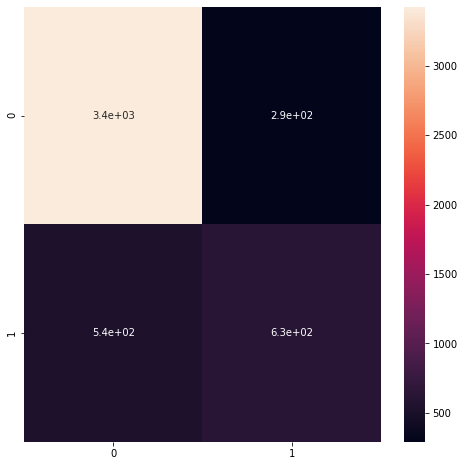

In [370]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

stratifiedModelling(x,y,lg)

### Decision Tree Classifier

List of accuracy are:  [0.7723643807574206, 0.7709314227226203, 0.7811220311220312, 0.7753890253890254, 0.7733415233415234, 0.773955773955774, 0.769041769041769, 0.7682227682227682, 0.7706797706797707, 0.7798935298935299]
The mean accuracy is:  0.7734941995126233
The accuracy score is 0.7798935298935299
The Classification report is:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      3715
           1       0.54      0.56      0.55      1169

    accuracy                           0.78      4884
   macro avg       0.70      0.70      0.70      4884
weighted avg       0.78      0.78      0.78      4884



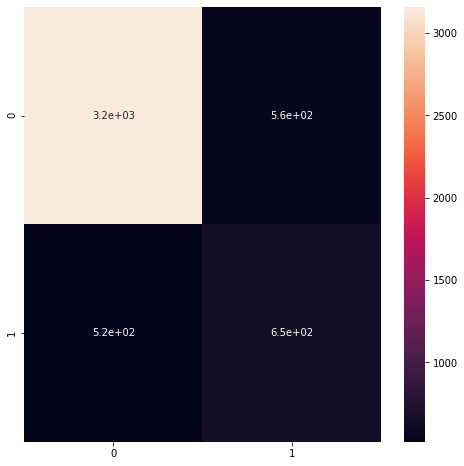

In [373]:
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier()
stratifiedModelling(x,y,tree)

### Random Forest Classifier

List of accuracy are:  [0.7606960081883316, 0.7606960081883316, 0.7608517608517609, 0.7608517608517609, 0.7608517608517609, 0.7606470106470107, 0.7606470106470107, 0.7606470106470107, 0.7606470106470107, 0.7606470106470107]
The mean accuracy is:  0.7607182352167
The accuracy score is 0.7606470106470107
The Classification report is:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      3715
           1       0.00      0.00      0.00      1169

    accuracy                           0.76      4884
   macro avg       0.38      0.50      0.43      4884
weighted avg       0.58      0.76      0.66      4884



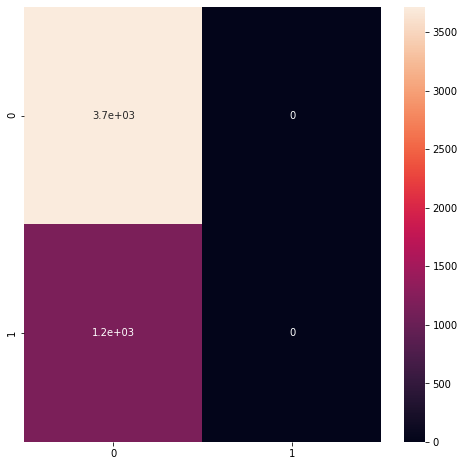

In [375]:
from sklearn.ensemble import RandomForestClassifier

rdmforest = RandomForestClassifier(max_depth=2, random_state=42)
stratifiedModelling(x,y,rdmforest)

#### The best performing model is logistic regression with the acurracy score 0.8306715806715806.